## Diabetes prediction project using dataset of 2021

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

In [2]:
df = pd.read_csv('diabetes_2021.csv')
df.shape

(236378, 22)

In [3]:
df.head(10)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0,1.0,1,15.0,1.0,0.0,0.0,0,1,...,1,0.0,5.0,10.0,20.0,0.0,0,11,4.0,5.0
1,2.0,1,0.0,1,28.0,0.0,0.0,1.0,0,1,...,1,0.0,2.0,0.0,0.0,0.0,0,11,4.0,3.0
2,2.0,1,1.0,1,33.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,10.0,0.0,0.0,0,9,4.0,7.0
3,2.0,0,1.0,1,29.0,0.0,1.0,1.0,1,1,...,1,0.0,5.0,0.0,30.0,1.0,1,12,3.0,4.0
4,0.0,0,0.0,1,24.0,1.0,0.0,0.0,0,0,...,1,0.0,3.0,0.0,0.0,1.0,1,13,5.0,6.0
5,0.0,1,0.0,1,40.0,1.0,0.0,0.0,1,1,...,1,0.0,3.0,5.0,25.0,1.0,0,10,4.0,8.0
6,0.0,1,1.0,1,27.0,1.0,0.0,0.0,0,0,...,1,0.0,4.0,25.0,0.0,0.0,0,10,5.0,3.0
7,2.0,0,0.0,1,24.0,0.0,0.0,1.0,0,0,...,1,0.0,4.0,0.0,0.0,0.0,1,12,6.0,7.0
8,0.0,1,1.0,1,30.0,0.0,0.0,0.0,0,1,...,1,0.0,2.0,0.0,0.0,0.0,0,7,4.0,6.0
9,0.0,1,1.0,1,36.0,1.0,0.0,0.0,0,0,...,1,0.0,4.0,0.0,0.0,0.0,1,10,4.0,8.0


In [4]:
df.rename(columns={'Diabetes_012': 'Diabetes'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236378 entries, 0 to 236377
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes              236378 non-null  float64
 1   HighBP                236378 non-null  int64  
 2   HighChol              236378 non-null  float64
 3   CholCheck             236378 non-null  int64  
 4   BMI                   236378 non-null  float64
 5   Smoker                236378 non-null  float64
 6   Stroke                236378 non-null  float64
 7   HeartDiseaseorAttack  236378 non-null  float64
 8   PhysActivity          236378 non-null  int64  
 9   Fruits                236378 non-null  int64  
 10  Veggies               236378 non-null  int64  
 11  HvyAlcoholConsump     236378 non-null  int64  
 12  AnyHealthcare         236378 non-null  int64  
 13  NoDocbcCost           236378 non-null  float64
 14  GenHlth               236378 non-null  float64
 15  

In [5]:
# verify if there are any numbers with decimal values in the 
# columns that are dtype float64
has_decimal_counter = 0
no_decimal_column_list = []
for column in df.columns:
    if df[column].dtype == 'float64':
        has_decimal = any(x != int(x) for x in df[column])
        if has_decimal:
            print("Column", column, "contains numbers with decimals.")
            has_decimal_counter +=1
        else:
            print("Column", column, "DOES NOT contain numbers with decimals.")
            no_decimal_column_list.append(column)

print(f"There are {has_decimal_counter} columns with decimal values in the df.")

Column Diabetes DOES NOT contain numbers with decimals.
Column HighChol DOES NOT contain numbers with decimals.
Column BMI DOES NOT contain numbers with decimals.
Column Smoker DOES NOT contain numbers with decimals.
Column Stroke DOES NOT contain numbers with decimals.
Column HeartDiseaseorAttack DOES NOT contain numbers with decimals.
Column NoDocbcCost DOES NOT contain numbers with decimals.
Column GenHlth DOES NOT contain numbers with decimals.
Column MentHlth DOES NOT contain numbers with decimals.
Column PhysHlth DOES NOT contain numbers with decimals.
Column DiffWalk DOES NOT contain numbers with decimals.
Column Education DOES NOT contain numbers with decimals.
Column Income DOES NOT contain numbers with decimals.
There are 0 columns with decimal values in the df.


In [6]:
# verify the columns of dtype float64 that have no decimal values
print(no_decimal_column_list)

['Diabetes', 'HighChol', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Education', 'Income']


In [7]:
# turn all variables in dtype int64
for column in no_decimal_column_list:
    df[column] = df[column].astype('int64')

print(df.dtypes)

Diabetes                int64
HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
dtype: object


### Analyzing the information

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236378 entries, 0 to 236377
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes              236378 non-null  int64
 1   HighBP                236378 non-null  int64
 2   HighChol              236378 non-null  int64
 3   CholCheck             236378 non-null  int64
 4   BMI                   236378 non-null  int64
 5   Smoker                236378 non-null  int64
 6   Stroke                236378 non-null  int64
 7   HeartDiseaseorAttack  236378 non-null  int64
 8   PhysActivity          236378 non-null  int64
 9   Fruits                236378 non-null  int64
 10  Veggies               236378 non-null  int64
 11  HvyAlcoholConsump     236378 non-null  int64
 12  AnyHealthcare         236378 non-null  int64
 13  NoDocbcCost           236378 non-null  int64
 14  GenHlth               236378 non-null  int64
 15  MentHlth              236378 non-n

In [9]:
df['GenHlth'].value_counts()

GenHlth
2    85202
3    73088
1    41475
4    27821
5     8792
Name: count, dtype: int64

array([[<Axes: title={'center': 'HighBP'}>,
        <Axes: title={'center': 'HighChol'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Smoker'}>,
        <Axes: title={'center': 'Stroke'}>,
        <Axes: title={'center': 'HeartDiseaseorAttack'}>]], dtype=object)

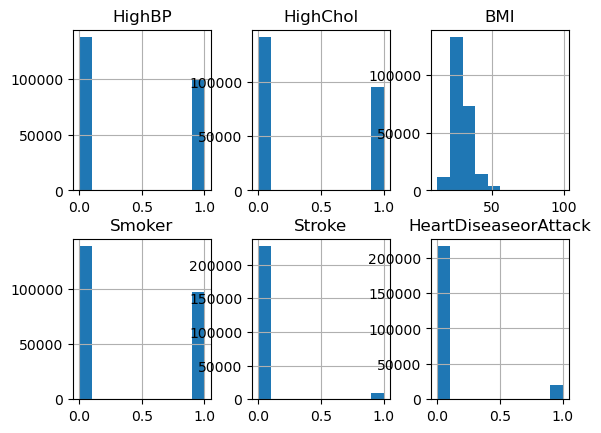

In [10]:
# analyzing some of the information
basic_health_columns = ['HighBP', 'HighChol', 'BMI', 'Smoker',
                         'Stroke', 'HeartDiseaseorAttack',
                         'PhysActivity', 'Fruits', 'Veggies',
                         'HvyAlcoholConsump']

df[basic_health_columns[:6]].hist(layout=(2,3))

array([[<Axes: title={'center': 'PhysActivity'}>,
        <Axes: title={'center': 'Fruits'}>],
       [<Axes: title={'center': 'Veggies'}>,
        <Axes: title={'center': 'HvyAlcoholConsump'}>]], dtype=object)

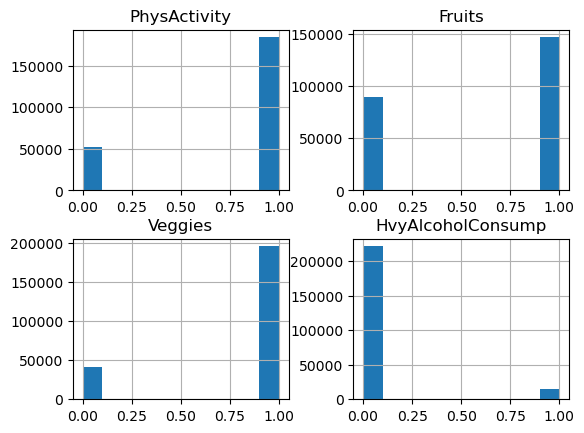

In [11]:
df[basic_health_columns[6:]].hist(layout=(2,2))

<Axes: >

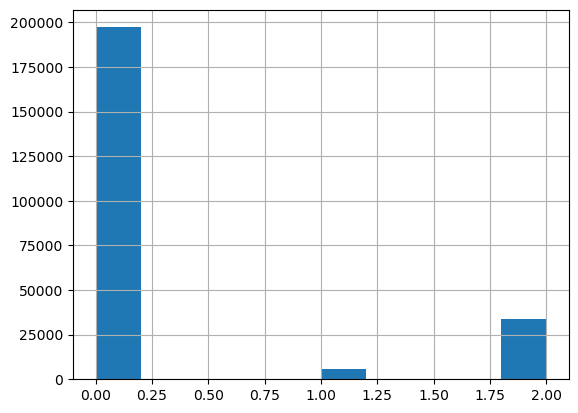

In [12]:
df['Diabetes'].hist()

In [13]:
# mapping BMI feature
bmi_mapping = {
    1: 'underweight',
    2: 'normal weight',
    3: 'overweight',
    4: 'obesity'
}

def classify_bmi(bmi):
    if bmi < 18.5:
        return bmi_mapping[1]
    elif 18.5 <= bmi < 25.0:
        return bmi_mapping[2]
    elif 25.0 <= bmi < 30.0:
        return bmi_mapping[3]
    else:
        return bmi_mapping[4]

# apply the classification function to create the new column
df["BMI_CAT"] = df["BMI"].apply(classify_bmi)

print(df[['BMI', 'BMI_CAT']].head())

   BMI        BMI_CAT
0   15    underweight
1   28     overweight
2   33        obesity
3   29     overweight
4   24  normal weight


In [14]:
# making BMI one-hot encoding
bmi_ohe = pd.get_dummies(df["BMI_CAT"])
bmi_ohe = bmi_ohe.astype(int)  # turn into 0's and 1's instead of False or True
bmi_ohe.head(10)

,normal weight,obesity,overweight,underweight
0,0,0,0,1
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,1,0,0,0
8,0,1,0,0
9,0,1,0,0


In [15]:
# analyzing some other features
health_columns = ['GenHlth', 'MentHlth', 'PhysHlth']
df[health_columns].describe()

,GenHlth,MentHlth,PhysHlth
count,236378.000000,236378.000000,236378.000000
mean,2.480717,3.937710,3.751297
std,1.029134,7.886506,8.245907
min,1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000
75%,3.000000,4.000000,2.000000
max,5.000000,30.000000,30.000000


array([[<Axes: title={'center': 'GenHlth'}>,
        <Axes: title={'center': 'MentHlth'}>],
       [<Axes: title={'center': 'PhysHlth'}>, <Axes: >]], dtype=object)

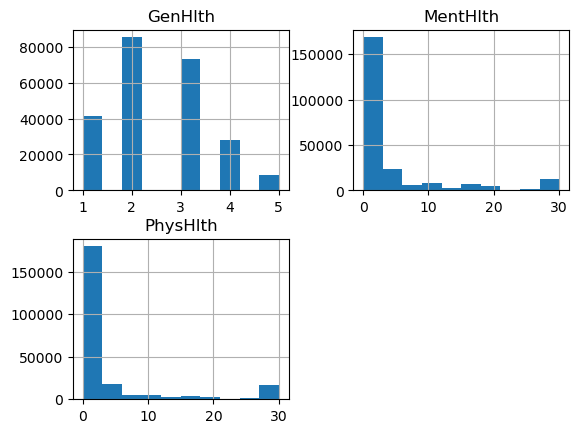

In [16]:
df[health_columns].hist()

In [17]:
df.describe()

,Diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,...,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000
mean,0.307791,0.418558,0.402059,0.963347,28.953579,0.411997,0.038900,0.086548,0.779231,0.621259,...,0.962573,0.063737,2.480717,3.937710,3.751297,0.153948,0.477824,7.863930,5.139099,6.927451
std,0.705037,0.493324,0.490315,0.187909,6.552055,0.492196,0.193356,0.281172,0.414766,0.485074,...,0.189807,0.244284,1.029134,7.886506,8.245907,0.360900,0.499509,3.236997,0.946185,2.375450
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,4.000000,2.000000,0.000000,1.000000,10.000000,6.000000,9.000000
max,2.000000,1.000000,1.000000,1.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,11.000000


In [18]:
# create deepcopy to avoid changes in the original dataframe
df_2 = deepcopy(df)

In [19]:
# concatenate OHE with original dataframe
df_with_ohe = pd.concat([df_2, bmi_ohe], axis=1)
df_with_ohe[['BMI_CAT', 'underweight', 'normal weight', 'overweight', 'obesity']].head(10)

,BMI_CAT,underweight,normal weight,overweight,obesity
0,underweight,1,0,0,0
1,overweight,0,0,1,0
2,obesity,0,0,0,1
3,overweight,0,0,1,0
4,normal weight,0,1,0,0
5,obesity,0,0,0,1
6,overweight,0,0,1,0
7,normal weight,0,1,0,0
8,obesity,0,0,0,1
9,obesity,0,0,0,1


In [20]:
df_with_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236378 entries, 0 to 236377
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Diabetes              236378 non-null  int64 
 1   HighBP                236378 non-null  int64 
 2   HighChol              236378 non-null  int64 
 3   CholCheck             236378 non-null  int64 
 4   BMI                   236378 non-null  int64 
 5   Smoker                236378 non-null  int64 
 6   Stroke                236378 non-null  int64 
 7   HeartDiseaseorAttack  236378 non-null  int64 
 8   PhysActivity          236378 non-null  int64 
 9   Fruits                236378 non-null  int64 
 10  Veggies               236378 non-null  int64 
 11  HvyAlcoholConsump     236378 non-null  int64 
 12  AnyHealthcare         236378 non-null  int64 
 13  NoDocbcCost           236378 non-null  int64 
 14  GenHlth               236378 non-null  int64 
 15  MentHlth         

### Using Multiclass Logistic Regression
Given the dependent variable spans from 0 for no diabetes, 1 for prediabetes, to 2 for diabetes, employing a multiclass logistic regression model is imperative.

Different models will be used in this project.

In [30]:
y = df_with_ohe['Diabetes']
X = df_with_ohe.drop(columns=['Diabetes', 'BMI_CAT'])

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(165464, 25)
(70914, 25)
(165464,)
(70914,)


In [34]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=5000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=5000, multi_class='multinomial')

In [35]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = lr.predict(X_test)

In [36]:
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.86      0.98      0.91     59214
           1       0.00      0.00      0.00      1647
           2       0.53      0.18      0.27     10053

    accuracy                           0.84     70914
   macro avg       0.46      0.38      0.39     70914
weighted avg       0.79      0.84      0.80     70914



c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
